In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from importlib import reload
import package_LAB
package_LAB = reload(package_LAB)
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_LAB import PID_RT,LeadLag_RT




(0.0, 50.0)

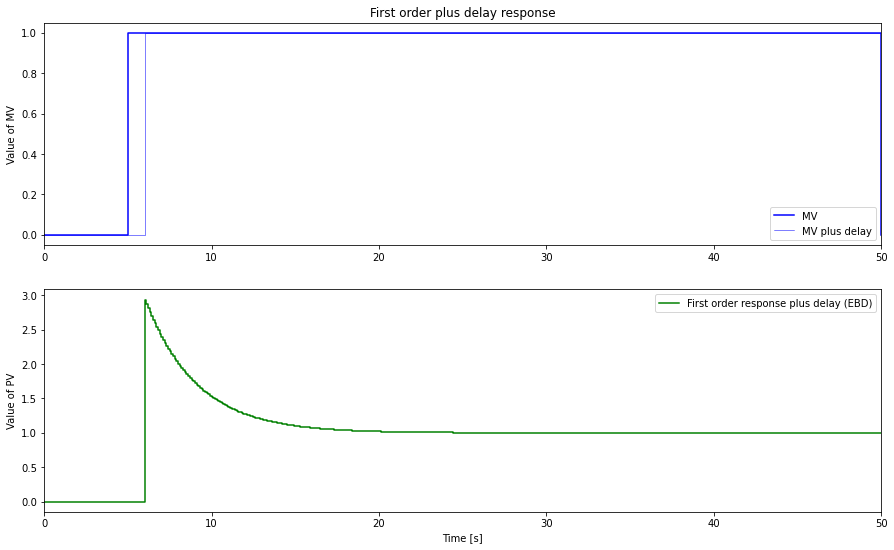

In [2]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, TSim: 0}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
TLead = 9
TLag = 3
theta = 1

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LeadLag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_EBD,PVInit=0,method = 'EBD')
    #LeadLag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_EFD,0,'EFD')
    #LeadLag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
# plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
# plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

(0.0, 100.0)

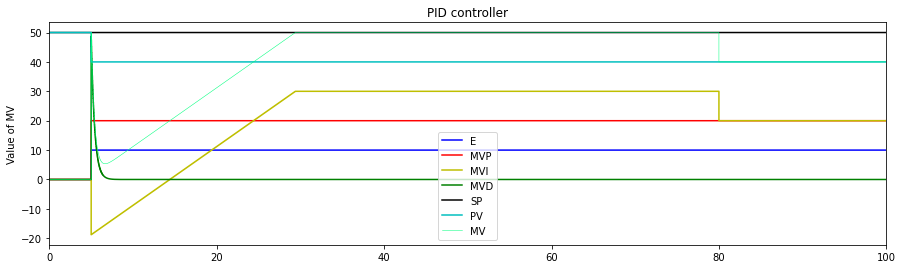

In [3]:
TSim = 100
Ts = 0.01
N = int(TSim/Ts) + 1

# Path for MV
SPPath = {0:50, 5:50, 50:50, 80:50, TSim: 50}
PVPath = {0:50, 5:40, 50:40, 80:40, TSim: 40}
MVManPath = {0:50, 5:40, 50:40, 80:40, TSim: 40}
ManPath = {0: False, 0:False, 50:False, 80: True, TSim: False}
MVFFPath = {0:0}

t = []
SP = []
SPDelay = []

PV = []
PVDelay = []

PV_EBD = []
PV_EFD = []
PV_TRAP = []



MVP=[]
MVI=[]
MVD=[]
MV = []
E = []
MVMan=[]
Man = []
MVFF = []

# Parameters
Kp = 1
T = 5
theta = 10

Ti = 10
Td = 1
alpha = 0.4
MVMin =0
MVMax = 50

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFPath,t,MVFF)
    PID_RT(SP,PV,Man,MVMan,0,2,Ti,Td,alpha,Ts,MVMin,MVMax,MV,MVP,MVI,MVD,E,False,0,'EBD-EBD')

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,E,'b-',label='E',where='post')
plt.step(t,MVP,'r-',label='MVP',where='post')
plt.step(t,MVI,'y-',label='MVI',where='post')
plt.step(t,MVD,'g-',label='MVD',where='post')
plt.step(t,SP,'k-',label='SP',where='post')
plt.step(t,PV,'c-',label='PV',where='post')
plt.step(t,MV,'springgreen',linewidth=0.5,label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('PID controller')
plt.legend(loc='best')
plt.xlim([0, TSim])
